### **MACHINE LEARNING NA INDUSTRIA** - ***PREVISÃO DE EMISSÃO DE GASES & PRODUÇÃO COM JANELA TEMPORAL***

Este documento tem o intuíto de documentar e demonstrar a criação de modelos de machine learning usando janela temporal e a bibliotéca de automl "Pycaret"

---
#### PROBLEMA : <br><br> Uma indústria gostaria de identificar os melhores cenários (combinações de máquinas) para emissões de gases.

No exemplo temos 5 tipos de máquinas, e a quantidade ativa naquela data e horário.
Sobre o dataset:
*   Foram coletados dados de 15 em 15 minutos
*   Cada máquina possui monitoramento de temperatura e consumo de energia
*   pressão do sistema
*   Se houve injeção de gás no sistema (1 = Sim, 0 = Não)
*   produção
*   emissão de gases

<br>
Para essa demonstração, será utilizado um dataframe com dados fictícios gerados de forma aleatória

### Gerando dataset fictícios

---



In [18]:
# Importando bibliotécas
import pandas as pd
import random
import seaborn as sn
from datetime import datetime, timedelta

# Começo e fim da coleta de dados
data_inicial = datetime(2022, 6, 1)
data_final = datetime(2023, 12, 1)
delta_tempo = timedelta(minutes=15)

# Criando variáveis
temperatura_m1 = []
temperatura_m2 = []
temperatura_m3 = []
temperatura_m4 = []
temperatura_m5 = []
datas_horas = []
pressao = []
producao = []
injecao_gas = []
consumo_energia_m1 = []
consumo_energia_m2 = []
consumo_energia_m3 = []
consumo_energia_m4 = []
consumo_energia_m5 = []
maquina_tipo_1 = []
maquina_tipo_2 = []
maquina_tipo_3 = []
maquina_tipo_4 = []
maquina_tipo_5 = []
emissao_gases = []

# Gerando dados fictícios
data_atual = data_inicial
while data_atual <= data_final:
    datas_horas.append(data_atual)
    temperatura_m1.append(random.uniform(20, 40))
    temperatura_m2.append(random.uniform(25, 35))
    temperatura_m3.append(random.uniform(30, 45))
    temperatura_m4.append(random.uniform(15, 25))
    temperatura_m5.append(random.uniform(35, 50))
    pressao.append(random.uniform(1, 10))
    producao.append(random.uniform(100, 200))
    injecao_gas.append(random.uniform(0, 1))
    consumo_energia_m1.append(random.uniform(50, 100))
    consumo_energia_m2.append(random.uniform(60, 110))
    consumo_energia_m3.append(random.uniform(70, 120))
    consumo_energia_m4.append(random.uniform(40, 90))
    consumo_energia_m5.append(random.uniform(80, 130))
    maquina_tipo_1.append(random.choice([0, 5]))
    maquina_tipo_2.append(random.choice([0, 4]))
    maquina_tipo_3.append(random.choice([0, 4]))
    maquina_tipo_4.append(random.choice([0, 2]))
    maquina_tipo_5.append(random.choice([0, 1]))
    emissao_gases.append(random.uniform(0, 10))
    data_atual += delta_tempo

# Criando dataframe
dados_maquinas = pd.DataFrame({
    'Data e Hora': datas_horas,
    'Máquina 1': maquina_tipo_1,
    'Máquina 2': maquina_tipo_2,
    'Máquina 3': maquina_tipo_3,
    'Máquina 4': maquina_tipo_4,
    'Máquina 5': maquina_tipo_5,
    'Temperatura Máquina 1 (°C)': temperatura_m1,
    'Temperatura Máquina 2 (°C)': temperatura_m2,
    'Temperatura Máquina 3 (°C)': temperatura_m3,
    'Temperatura Máquina 4 (°C)': temperatura_m4,
    'Temperatura Máquina 5 (°C)': temperatura_m5,
    'Consumo de Energia Máquina 1 (kWh)': consumo_energia_m1,
    'Consumo de Energia Máquina 2 (kWh)': consumo_energia_m2,
    'Consumo de Energia Máquina 3 (kWh)': consumo_energia_m3,
    'Consumo de Energia Máquina 4 (kWh)': consumo_energia_m4,
    'Consumo de Energia Máquina 5 (kWh)': consumo_energia_m5,
    'Pressão (bar)': pressao,
    'producao (m³)': producao,
    'Injeção de Gás': injecao_gas,
    'Emissão de Gases (kg/h)': emissao_gases
})

# Exibindo as 5 primeiras linhas do dataset
dados_maquinas.head(5)


,Data e Hora,Máquina 1,Máquina 2,Máquina 3,Máquina 4,Máquina 5,Temperatura Máquina 1 (°C),Temperatura Máquina 2 (°C),Temperatura Máquina 3 (°C),Temperatura Máquina 4 (°C),Temperatura Máquina 5 (°C),Consumo de Energia Máquina 1 (kWh),Consumo de Energia Máquina 2 (kWh),Consumo de Energia Máquina 3 (kWh),Consumo de Energia Máquina 4 (kWh),Consumo de Energia Máquina 5 (kWh),Pressão (bar),producao (m³),Injeção de Gás,Emissão de Gases (kg/h)
0,2022-06-01 00:00:00,5,0,4,2,0,29.977017,27.670420,35.338597,16.362862,39.307831,82.909663,107.193621,86.241625,63.935596,109.350116,6.316502,163.429730,0.541827,6.333195
1,2022-06-01 00:15:00,5,4,0,2,1,36.989977,25.531216,39.577603,24.748391,48.204002,63.416493,71.348724,96.125829,72.513586,110.378741,4.614458,175.658417,0.897918,0.364528
2,2022-06-01 00:30:00,5,4,0,0,0,36.284307,25.105626,43.889267,23.279368,36.914086,94.171567,89.557311,97.906673,53.972425,85.654548,7.329029,180.353680,0.180930,6.606493
3,2022-06-01 00:45:00,0,4,4,2,1,35.572689,33.918161,31.710046,21.661124,45.036761,84.132548,106.522202,71.633820,83.453927,87.105902,6.863143,171.876275,0.907671,3.348193
4,2022-06-01 01:00:00,5,4,4,0,0,22.883821,29.071641,41.104109,17.426819,36.678197,98.388465,96.785515,88.080720,60.002243,105.668538,4.329448,125.031103,0.648135,4.250360


In [19]:
# Tamanho do dataset
dados_maquinas.shape

(52609, 20)

O cliente te informa, que o único dado que ele gostaria de informar/incluir para realizar a previsão, é o cenário das máquinas (quantidades de cada máquina ativa).
Imagine que ao olhar as combinações de cenários com as emissões você se deparasse com essa visão (Gráfico gerado com caso real):

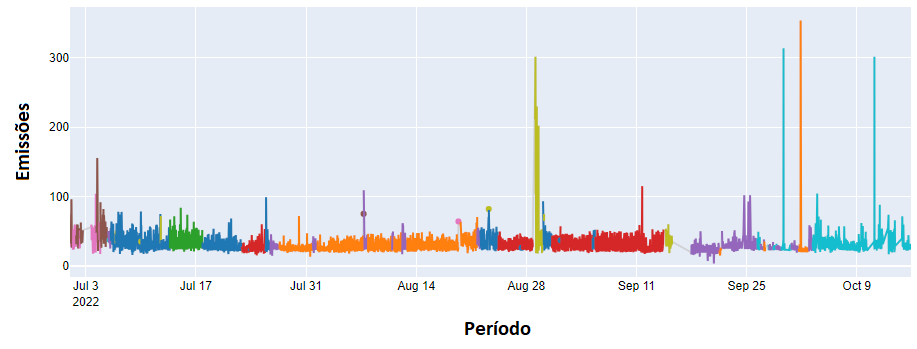

In [38]:
from IPython.display import Image, display
display(Image(filename='emissao_periodo.png'))

Contextualizando, no eixo horizontal temos o período, e no eixo vertical temos a quantidade de gás emitido.
As cores ditinguem os cenários, por exemplo o marrom é o cenario [2,3,1,0,0] ou seja, 2 'máquinas 1', 3 'máquinas 2' e assim por diante.

Observando o gráfico, você já deve ter pensado, que existe uma dificuldade na previsão, pois um mesmo cenário (cor) possui valores muito diferentes de emissões, e que talvez apenas a remoção de outliers não atenda, lmbrando que o cliente gostaria de prever todos os cenários, independente do momento.

### Abordagem de janela temporal

---



Como o cliente gostaria de prever as emissões para determinado cenário, apenas informando o conjunto (cenários) de máquinas ativas e como vemos variações de emissões para um mesmo cenário, o modelo não conseguiria generalizar apenas com esses inputs.<br>
Os dados guardados são do momento da captura, não conseguiríamos utilizar para previsão, pois não teríamos essa informação futura para o modelo (vazamento de dados). <br>
A solução abordada foi criar janelas temporais também conhecida como 'lags', ou seja, criar novas variáveis com os valores dos períodos anteriores. <br>
Assim, poderíamos usar todas as varíaveis de períodos anteriores, para tentarem prever uma emissão de gás atual, ou futura. Por exemplo, o dataset possui no dia '2022-06-01 00:15:00' o cenário [0,1,1,0,1] e emissão 5,96. Para prevê-lo eu utilizaria os dados anteriores no dia '2022-06-01 00:00:00' e o período da previsão (prever 1 hora, 5 horas, dias..) dependeria apenas do agrupamento da janela temporal.
<br>
<br>
Complicou? Vai ficar mais simples conforme o desenvolvimento.

In [21]:
# Criação de janela temporal
# df = dataframe que será manipulado.
# passos = quantidade de períodos anteriores a serem gerados.
# variaveis_shift = variáveis que serão manipuladas, aceitando lista ou 'all' para todas.
def shift(df, passos, variaveis_shift):
  df = df.sort_values(by='Data e Hora', ascending=True)
  if variaveis_shift == 'all':
    variaveis_shift = df.columns.drop('Data e Hora')
  for qtd in range(1,passos+1,1):
    for var in variaveis_shift:
      df[var+'_T'+str(qtd)] = df[var].shift(qtd)
  df = df[passos:]
  return df

In [22]:
# Criando dataframe com janela temporal 
dados_maquinas_shift = shift(dados_maquinas, 5, 'all')
dados_maquinas_shift.head(3)

,Data e Hora,Máquina 1,Máquina 2,Máquina 3,Máquina 4,Máquina 5,Temperatura Máquina 1 (°C),Temperatura Máquina 2 (°C),Temperatura Máquina 3 (°C),Temperatura Máquina 4 (°C),...,Temperatura Máquina 5 (°C)_T5,Consumo de Energia Máquina 1 (kWh)_T5,Consumo de Energia Máquina 2 (kWh)_T5,Consumo de Energia Máquina 3 (kWh)_T5,Consumo de Energia Máquina 4 (kWh)_T5,Consumo de Energia Máquina 5 (kWh)_T5,Pressão (bar)_T5,producao (m³)_T5,Injeção de Gás_T5,Emissão de Gases (kg/h)_T5
5,2022-06-01 01:15:00,5,0,4,2,0,33.527160,26.770693,37.725035,15.719198,...,39.307831,82.909663,107.193621,86.241625,63.935596,109.350116,6.316502,163.429730,0.541827,6.333195
6,2022-06-01 01:30:00,0,0,4,2,0,32.597481,28.745502,30.683245,22.303907,...,48.204002,63.416493,71.348724,96.125829,72.513586,110.378741,4.614458,175.658417,0.897918,0.364528
7,2022-06-01 01:45:00,5,0,4,0,1,38.056960,30.724631,32.502460,23.402809,...,36.914086,94.171567,89.557311,97.906673,53.972425,85.654548,7.329029,180.353680,0.180930,6.606493


In [23]:
# Exemplo prático da janela temporal
dados_maquinas_shift[['Data e Hora','Emissão de Gases (kg/h)','Emissão de Gases (kg/h)_T1','Emissão de Gases (kg/h)_T2','Emissão de Gases (kg/h)_T3','Emissão de Gases (kg/h)_T4','Emissão de Gases (kg/h)_T5']].head(6)

,Data e Hora,Emissão de Gases (kg/h),Emissão de Gases (kg/h)_T1,Emissão de Gases (kg/h)_T2,Emissão de Gases (kg/h)_T3,Emissão de Gases (kg/h)_T4,Emissão de Gases (kg/h)_T5
5,2022-06-01 01:15:00,3.693006,4.250360,3.348193,6.606493,0.364528,6.333195
6,2022-06-01 01:30:00,1.549398,3.693006,4.250360,3.348193,6.606493,0.364528
7,2022-06-01 01:45:00,0.277934,1.549398,3.693006,4.250360,3.348193,6.606493
8,2022-06-01 02:00:00,7.672644,0.277934,1.549398,3.693006,4.250360,3.348193
9,2022-06-01 02:15:00,1.181570,7.672644,0.277934,1.549398,3.693006,4.250360
10,2022-06-01 02:30:00,7.187281,1.181570,7.672644,0.277934,1.549398,3.693006


Como podemos observar acima, criamos uma janela temporal de 5 passos, ou seja de 15min, 30min, 45min, 1h e 1h15 min antes.
Então podemos usar essas séries temporais de emissão, caso possuam correlação causal (aqui criamos o dataframe de forma aleatória, ou seja, não teremos correlação) para prever as variáveis atuais, como a própria emissão atual.

<Axes: >

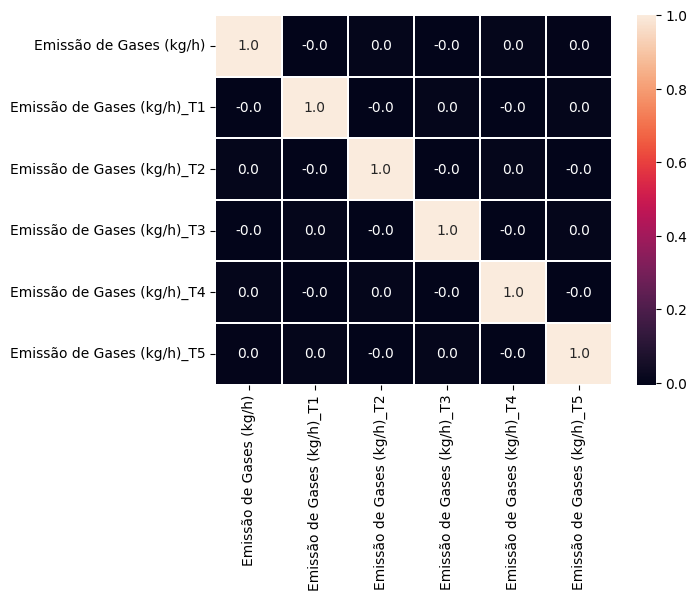

In [30]:
# Exemplo de verificação de correlação entre as variáveis temporais criadas

var_corr = ['Emissão de Gases (kg/h)','Emissão de Gases (kg/h)_T1','Emissão de Gases (kg/h)_T2','Emissão de Gases (kg/h)_T3','Emissão de Gases (kg/h)_T4','Emissão de Gases (kg/h)_T5']
correlation = dados_maquinas_shift.corr()
plot = sn.heatmap(correlation[var_corr][correlation.index.isin(var_corr)], annot = True, fmt=".1f", linewidths=.01)
plot

Abaixo vemos uma correlação utilizando dados do caso real mascarado, onde a boa prática é a eliminação da multicolinearidade.

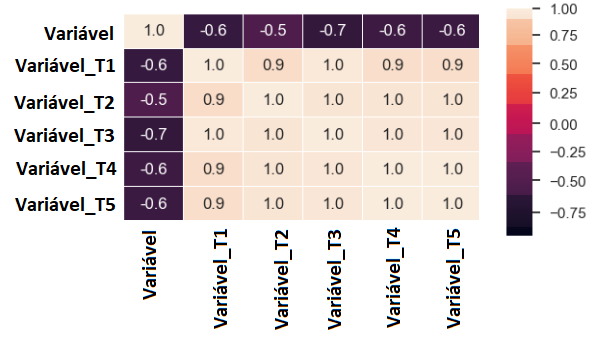

In [39]:
from IPython.display import Image, display
display(Image(filename='correlacao_periodo.png'))

### Modelagem de emissão

---

Para a criação do modelo de machine learning deste exemplo, iremos utilizar a biblioteca de automl "Pycaret", onde conseguimos facilmente comparar diversos modelos e testar vários tratamentos e abordagens